In [161]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
import torch.nn.functional as F
from tqdm import tqdm_notebook as tqdm
plt.style.use('seaborn-darkgrid')

# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

# Initial Performance Comparison

In [2]:
np.set_printoptions(precision=2)

parent_dir = '/home/manu/Projects/DNI-Bio/logs/mixed 32'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    acc = []
    test_acc = []
    grad_norm = []
    for f_name in os.listdir(method_dir):
        if os.path.isdir(os.path.join(method_dir, f_name)):
            # skip directories
            continue
        elif f_name.startswith('acc'):
            acc.append(np.load(os.path.join(method_dir, f_name))[-235:])
        elif f_name.startswith('test_accuracy'):
            test_acc.append(np.load(os.path.join(method_dir, f_name))[-1:])
        elif f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name))[-234:])
#         elif f_name.startswith('synth') and f_name.endswith('.npy'):
#             grad_norm.append(np.load(os.path.join(method_dir, f_name))[-234:])

    acc = np.array(acc)
    losses = np.array(losses)
    print('%-50s'%method + '%15f'%np.mean(acc) + '%15f'%test_acc[0][0])

dni                                                     88.007535      89.730000
dni_frozen_synthesizer                                  55.541334      56.950000
dni_frozen_synthesizer_nonzero                           9.857602       9.800000
dni_frozen_synthesizer_pretrained_10_epochs             30.464317      36.010000
dni_frozen_synthesizer_pretrained_10_epochs_synced      37.033466      37.750000
dni_frozen_synthesizer_pretrained_1_epochs              37.923316      37.290000
dni_frozen_synthesizer_pretrained_1_epochs_synced       41.190714      44.370000
dni_frozen_synthesizer_pretrained_20_epochs             16.097629      24.820000
dni_frozen_synthesizer_pretrained_20_epochs_synced      30.417221      45.900000
dni_frozen_synthesizer_pretrained_2_epochs              34.782247      46.940000
dni_frozen_synthesizer_pretrained_2_epochs_synced       36.031139      46.930000
dni_frozen_synthesizer_pretrained_3_epochs              34.081339      24.700000
dni_frozen_synthesizer_pretr

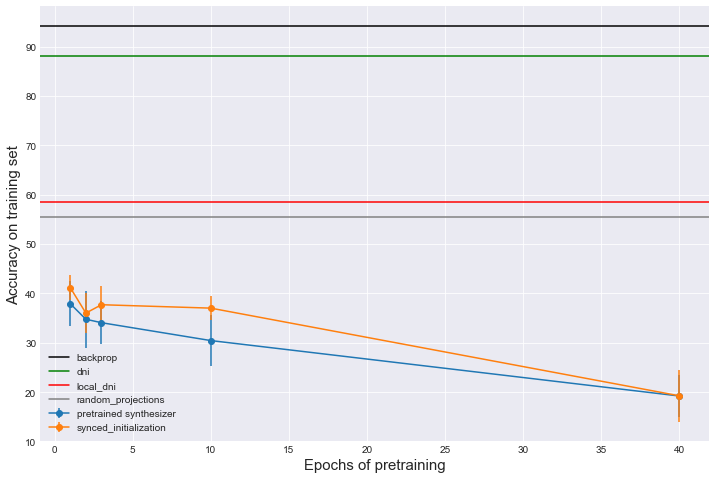

In [65]:
pretraining_epochs = [1, 2, 3, 10, 40]

synced_acc = [41.190714, 36.031139, 37.723293, 37.033466, 19.288010]
synced_acc_std = [4.279344, 7.163213, 6.547037, 4.138706, 9.049097]

pretrained_acc = [37.923316, 34.782247, 34.081339, 30.464317, 19.240913]
pretrained_acc_std = [7.874011, 10.031269, 7.454415, 8.849014, 7.453268]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Epochs of pretraining', fontsize=15)
ax1.set_ylabel('Accuracy on training set', fontsize=15)
ax1.errorbar(pretraining_epochs, pretrained_acc, yerr=pretrained_acc_std/np.sqrt(3), marker = 'o', label='pretrained synthesizer')
ax1.errorbar(pretraining_epochs, synced_acc, yerr=synced_acc_std/np.sqrt(3), marker = 'o', label='synced_initialization')
ax1.axhline(y=94.140625, color='black',label='backprop')
ax1.axhline(y=88.007535, color='green',label='dni')
ax1.axhline(y=58.572695, color='red',label='local_dni')
ax1.axhline(y=55.541334, color='gray',label='random_projections')
ax1.legend()

# Training Curves

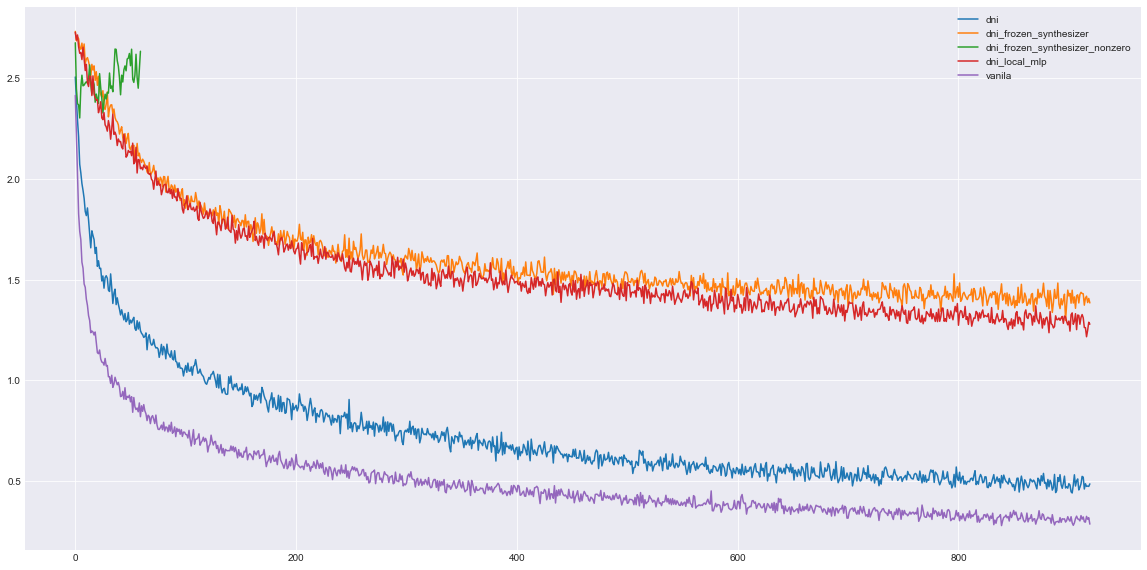

In [37]:
fig = plt.figure(figsize=(20,10))
parent_dir = '/home/manu/Projects/DNI-Bio/logs/mixed 32'
for method in sorted(os.listdir(parent_dir)):
    if "epochs" in method:
        continue
    method_dir = os.path.join(parent_dir, method)
    losses = []
    for f_name in os.listdir(method_dir):
        if f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name)))
    plt.plot(np.mean(losses, axis=0), label=method)

plt.legend()

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


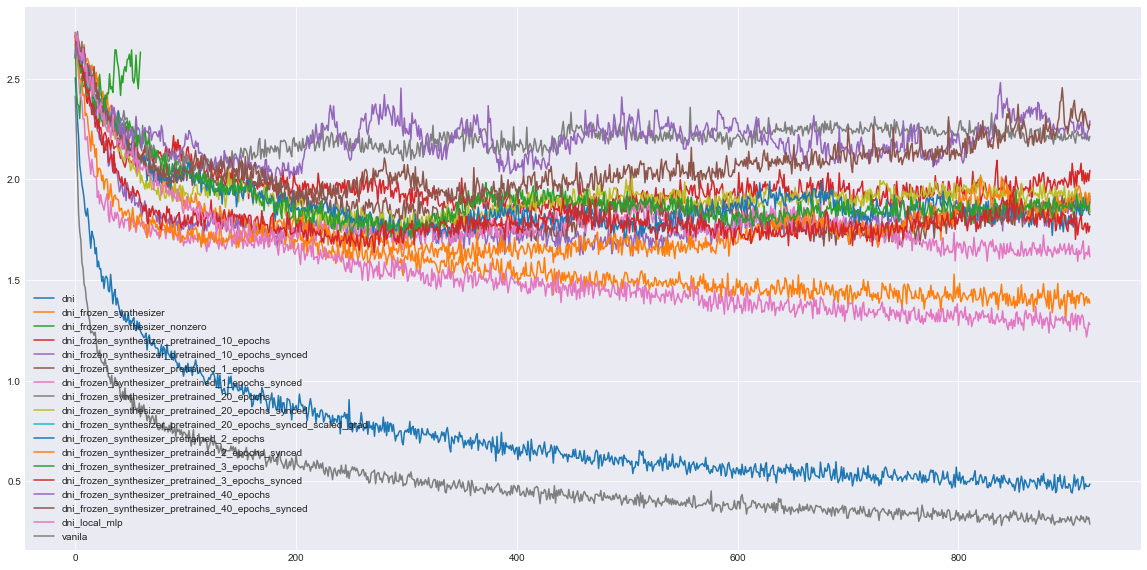

In [168]:
fig = plt.figure(figsize=(20,10))
parent_dir = '/home/manu/Projects/DNI-Bio/logs/mixed 32'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    for f_name in os.listdir(method_dir):
        if f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name)))
    plt.plot(np.mean(losses, axis=0), label=method)

plt.legend()

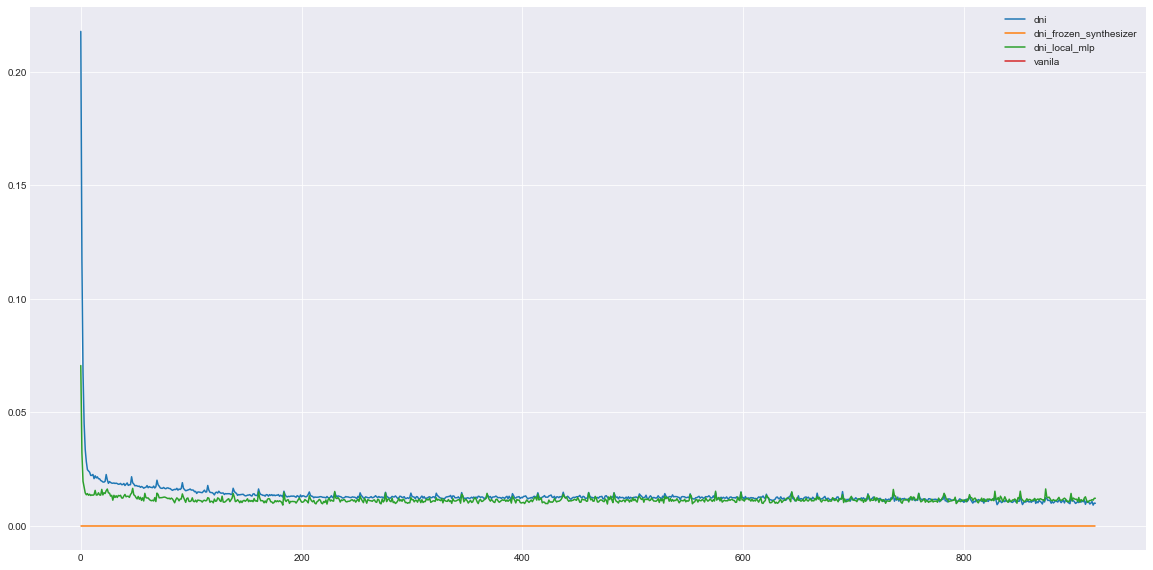

In [38]:
fig = plt.figure(figsize=(20,10))
parent_dir = '/home/manu/Projects/DNI-Bio/logs/mixed 32'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    grad_norms = []
    if method.endswith('nonzero') or 'epochs' in method:
        continue
    for f_name in os.listdir(method_dir):
        if f_name.startswith('synth') and f_name.endswith('.npy'):
            grad_norms.append(np.load(os.path.join(method_dir, f_name)))
    plt.plot(np.mean(grad_norms, axis=0), label=method)

plt.legend()

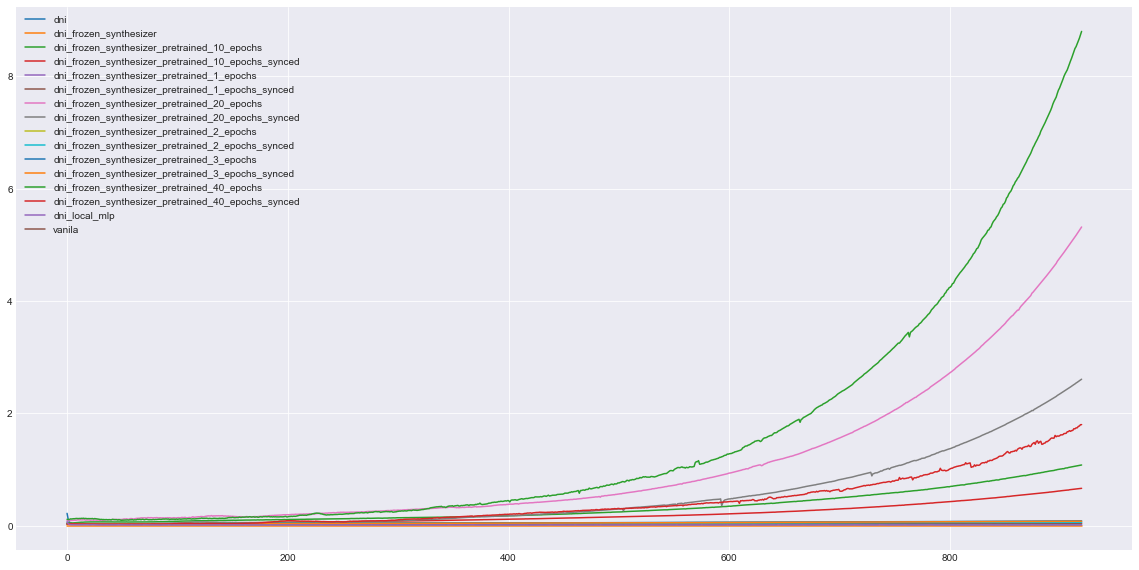

In [62]:
fig = plt.figure(figsize=(20,10))
parent_dir = '/home/manu/Projects/DNI-Bio/logs/mixed 32'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    grad_norms = []
    if method.endswith('nonzero'):
        continue
    for f_name in os.listdir(method_dir):
        if f_name.startswith('synth') and f_name.endswith('.npy'):
            grad_norms.append(np.load(os.path.join(method_dir, f_name)))
    plt.plot(np.mean(grad_norms, axis=0), label=method)

plt.legend()

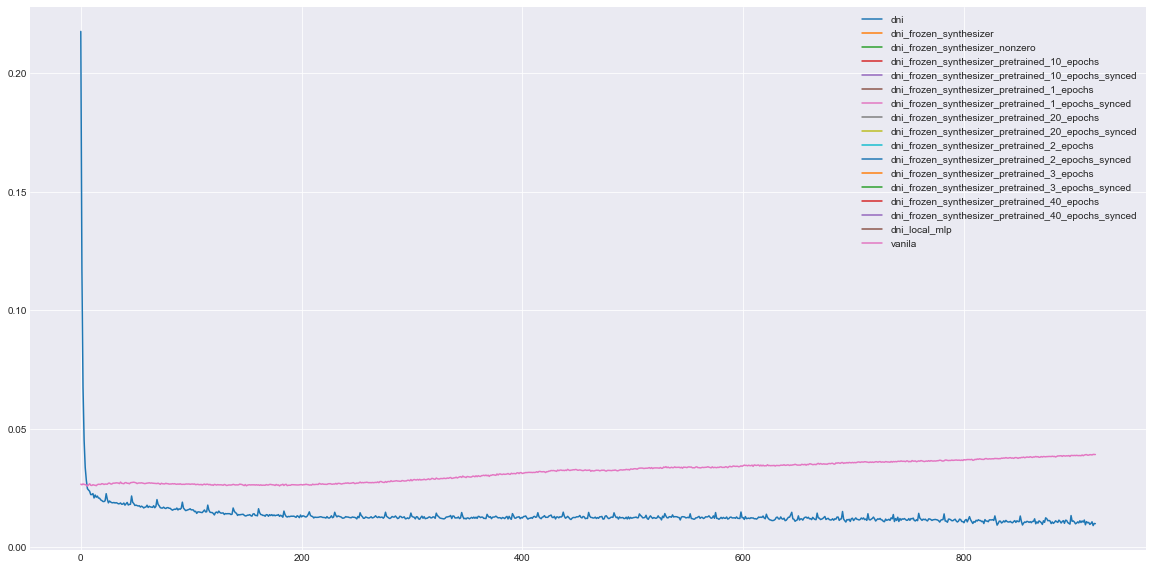

In [69]:
fig = plt.figure(figsize=(20,10))
parent_dir = '/home/manu/Projects/DNI-Bio/logs/mixed 32'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    grad_norms = []
    if method == 'dni_frozen_synthesizer_pretrained_1_epochs_synced' or method == 'dni':
        for f_name in os.listdir(method_dir):
            if f_name.startswith('synth') and f_name.endswith('.npy'):
                grad_norms.append(np.load(os.path.join(method_dir, f_name)))
    plt.plot(np.mean(grad_norms, axis=0), label=method)

plt.legend()

# Gradient Norms

In [150]:
unit_vectors = []
for i in range(1000):
    x = np.random.normal(size=32)
    unit_vectors.append(x/np.linalg.norm(x))
unit_vectors = torch.tensor(unit_vectors).float().to('cuda:0')

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


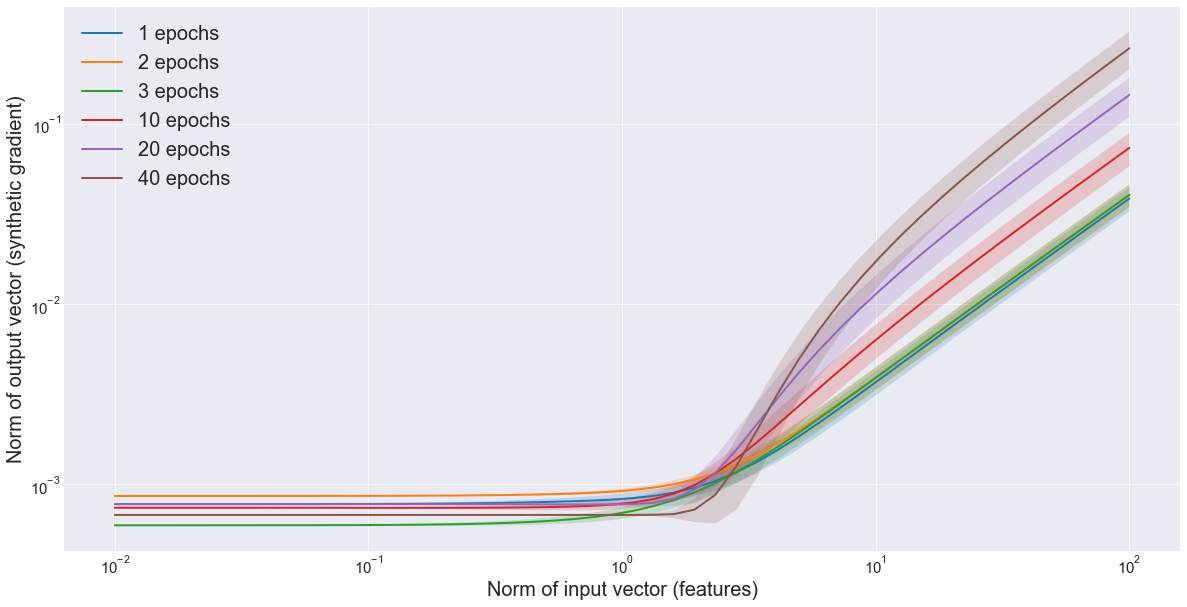

In [186]:
parent_dir = '/home/manu/Projects/DNI-Bio/logs/mixed 32/dni/weight_history/run_0'
fig = plt.figure(figsize=(20,10))
for epochs in [1, 2, 3, 10, 20, 40]:
    net = torch.load(os.path.join(parent_dir, 'epoch_'+str(epochs)+'.pt'))
    net.eval()
    synthesizer = net.backward_interface.synthesizer
    output_norm = []
    output_norm_std = []
    for input_norm in np.logspace(-2, 2):
        output_norms = torch.tensor(synthesizer(input_norm*unit_vectors, context=0)).norm(dim=1)
        output_norm.append(output_norms.mean().item())
        output_norm_std.append(output_norms.std().item())
    plt.loglog(np.logspace(-2, 2), output_norm, label=str(epochs) + ' epochs', linewidth=2)
    output_norm = np.array(output_norm)
    standard_error = np.array(output_norm_std)/np.sqrt(3)
    plt.fill_between(np.logspace(-2, 2), output_norm-standard_error, output_norm+standard_error, alpha=0.2)

plt.xlabel('Norm of input vector (features)', fontsize=20)
plt.ylabel('Norm of output vector (synthetic gradient)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=20)
plt.show()